# Imports

In [5]:
# Import Modules
import os
import pandas as pd
import numpy as np
from itertools import chain
import cv2
import split_folders

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

# Metrics
from sklearn.metrics import confusion_matrix, roc_curve,auc, classification_report

# Deep Learning
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

2.0.0


# Evaluating the CNN model on an independent dataset

## Dataset

In [55]:
# Define a path to the independent 
base_dir = "/floyd/input/colorectal_cancer"
ind_test_dir = os.path.join(base_dir, "CRC-VAL-HE-7K")

In [56]:
# Image generator
ind_test_generator = test_datagen.flow_from_directory(ind_test_dir,
                                                      batch_size=1,
                                                      target_size=(224,224),
                                                      class_mode='categorical',
                                                      shuffle=False,
                                                      seed=42,
                                                      color_mode='rgb')
# File names and number of images
filenames = ind_test_generator.filenames
nb_samples = len(filenames)

Found 7180 images belonging to 9 classes.


## Performance of the VGG19 model on the Independent Dataset

In [57]:
vgg_val_eval_7K = model_vgg19_03.evaluate_generator(ind_test_generator)

print('Loss:      {0:.4f}'.format(vgg_val_eval_7K[0]))
print('Accuracy:  {0:.4f}'.format(vgg_val_eval_7K[1]))


# Predict Probabilities
vgg_predictions_7K = model_vgg19_03.predict_generator(ind_test_generator, steps = nb_samples, verbose=1)
# Predict Labels
vgg_pred_labels_7K = np.argmax(vgg_predictions_7K, axis=1)

# Classification Report
print('|----------------------------------------------------------|')
print('|----Independent_Data--Classification Report-(VGG19)-------|')
print('|----------------------------------------------------------|')
print(classification_report(ind_test_generator.classes, vgg_pred_labels_7K, 
                            target_names=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM']))
# Confusion Matrix
vgg_conf_mat_7K = pd.DataFrame(confusion_matrix(ind_test_generator.classes, vgg_pred_labels_7K), 
                               index=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'], 
                               columns=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'])

Loss:      0.1906
Accuracy:  0.9390
7180/7180 [==============================] - 227s 32ms/step
|----------------------------------------------------------|
|----Independent_Data--Classification Report-(VGG19)-------|
|----------------------------------------------------------|
              precision    recall  f1-score   support

         ADI       1.00      0.96      0.98      1338
        BACK       1.00      1.00      1.00       847
         DEB       0.73      0.99      0.84       339
         LYM       0.99      0.81      0.89       634
         MUC       0.97      0.98      0.97      1035
         MUS       0.81      0.93      0.87       592
        NORM       0.92      0.95      0.94       741
         STR       0.90      0.70      0.79       421
         TUM       0.96      0.96      0.96      1233

   micro avg       0.94      0.94      0.94      7180
   macro avg       0.92      0.92      0.92      7180
weighted avg       0.94      0.94      0.94      7180



## Performance of the MobileNet model on the Independent Dataset

In [58]:
mobilenet_val_eval_7K = model_mobilenet_final.evaluate_generator(ind_test_generator)
print('Loss:      {}'.format(mobilenet_val_eval_7K[0]))
print('Accuracy:  {}'.format(mobilenet_val_eval_7K[1]))

# Predict probabilities
mobilenet_predictions_7K = model_mobilenet_03.predict_generator(ind_test_generator, steps = nb_samples, verbose=1)
# Predict labels
mobilenet_pred_labels_7K = np.argmax(mobilenet_predictions_7K, axis=1)

# Classification Report
print('----------------------------------------------------------')
print('---Independent_Data--Classification Report-(MobileNet)----')
print('----------------------------------------------------------')
print(classification_report(ind_test_generator.classes, mobilenet_pred_labels_7K, 
                            target_names=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM']))

# Confusion Matrix
mobilenet_conf_mat_7K = pd.DataFrame(confusion_matrix(ind_test_generator.classes, mobilenet_pred_labels_7K), 
                        index=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'], 
                        columns=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'])

Loss:      0.399919090978719
Accuracy:  0.9153203342618385
7180/7180 [==============================] - 72s 10ms/step
----------------------------------------------------------
---Independent_Data--Classification Report-(MobileNet)----
----------------------------------------------------------
              precision    recall  f1-score   support

         ADI       0.76      0.91      0.83      1338
        BACK       1.00      0.63      0.77       847
         DEB       0.20      1.00      0.33       339
         LYM       0.96      0.64      0.77       634
         MUC       1.00      0.05      0.09      1035
         MUS       0.50      0.98      0.66       592
        NORM       0.99      0.81      0.89       741
         STR       0.15      0.29      0.19       421
         TUM       1.00      0.20      0.33      1233

   micro avg       0.57      0.57      0.57      7180
   macro avg       0.73      0.61      0.54      7180
weighted avg       0.82      0.57      0.56      7180



## Performance of the ResNet50 model on the Independent Dataset

In [61]:
# Load the saved model
model_resnet50_04.load_weights('resent50_model_04_wt.h5')

# Evaluate the model on the independent dataset
resnet50_ind_eval_7K = model_resnet50_04.evaluate_generator(ind_test_generator)
print('Loss:     {}'.format(resnet50_ind_eval_7K[0]))
print('Accuracy: {}'.format(resnet50_ind_eval_7K[1]))

# Predict probabilities
resnet50_predictions_7K = model_resnet50_04.predict_generator(ind_test_generator, steps = nb_samples, verbose=1)
# Predict labels
resnet50_pred_labels_7K = np.argmax(resnet50_predictions_7K, axis=1)


# Classification Report
print('----------------------------------------------------------')
print('---Independent_Data--Classification Report-(MobileNet)----')
print('----------------------------------------------------------')
print(classification_report(ind_test_generator.classes, resnet50_pred_labels_7K, 
                            target_names=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM']))

# Confusion Matrix
resent50_conf_mat_7K = pd.DataFrame(confusion_matrix(ind_test_generator.classes, resnet50_pred_labels_7K), 
                        index=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'], 
                        columns=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'])

Loss:     0.3393666533328235
Accuracy: 0.9279944289693594
7180/7180 [==============================] - 190s 26ms/step
----------------------------------------------------------
---Independent_Data--Classification Report-(MobileNet)----
----------------------------------------------------------
              precision    recall  f1-score   support

         ADI       0.97      0.95      0.96      1338
        BACK       0.94      1.00      0.97       847
         DEB       0.79      0.97      0.87       339
         LYM       0.98      0.98      0.98       634
         MUC       0.98      0.92      0.95      1035
         MUS       0.74      0.80      0.77       592
        NORM       0.92      0.94      0.93       741
         STR       0.93      0.63      0.75       421
         TUM       0.95      0.98      0.97      1233

   micro avg       0.93      0.93      0.93      7180
   macro avg       0.91      0.91      0.90      7180
weighted avg       0.93      0.93      0.93      7180



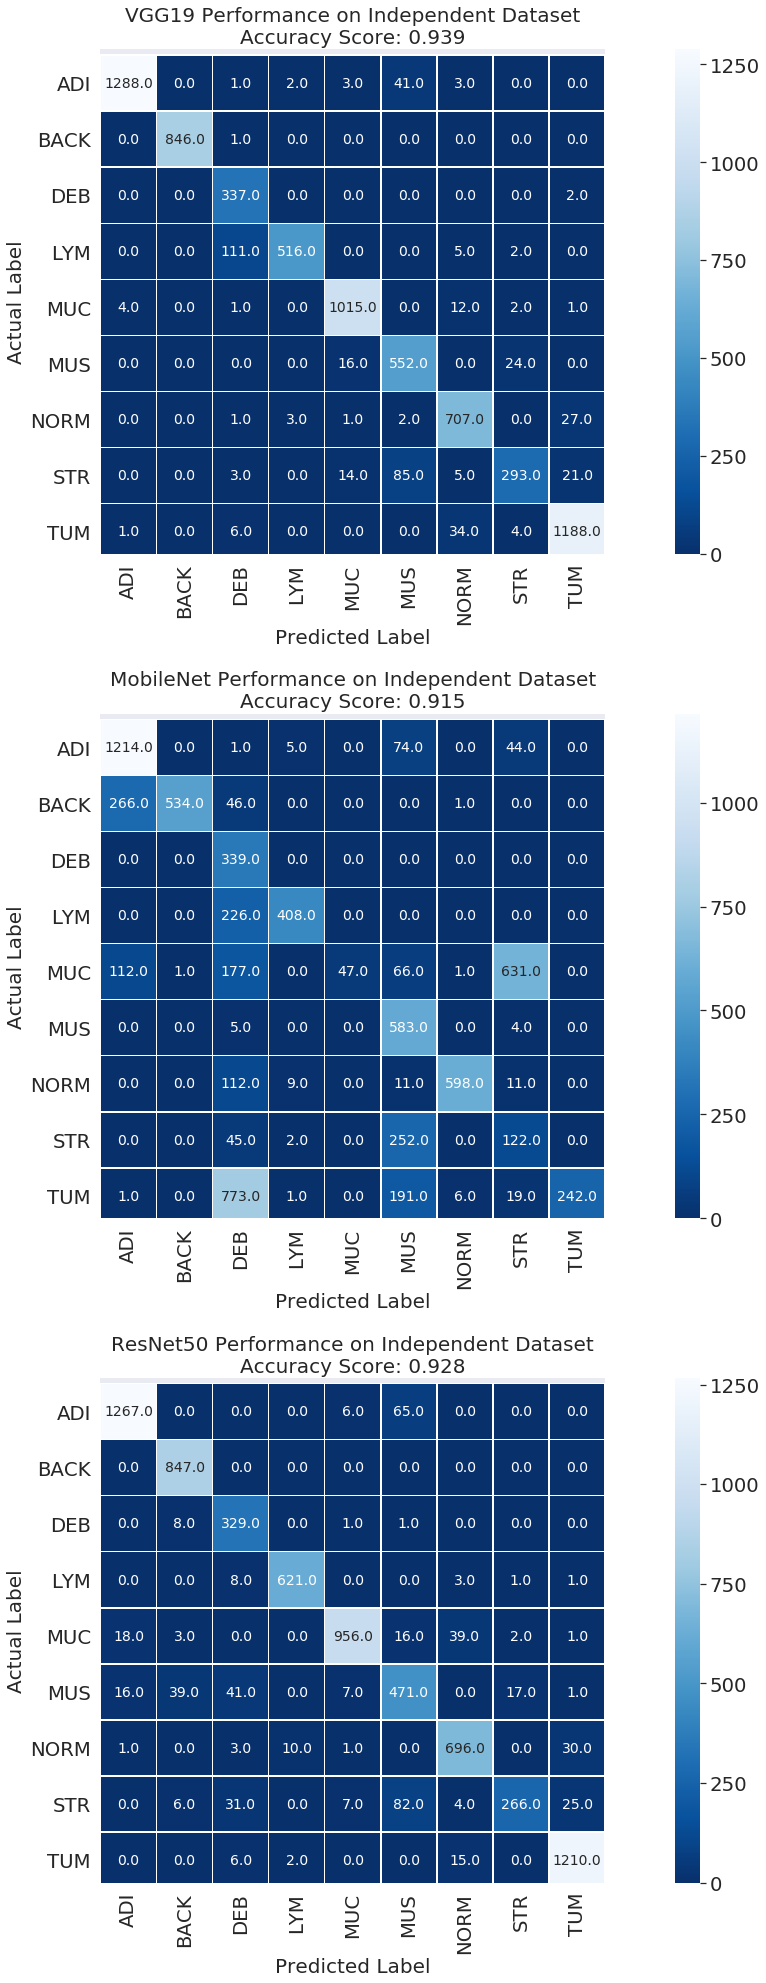

In [67]:
# Plot confusion matrices
sns.set(font_scale=1.8)
fig, ([ax1,ax2,ax3]) = plt.subplots(nrows=3, ncols=1, figsize=(20,28))

#ax1
sns.heatmap(vgg_conf_mat_7K, ax=ax1, annot=True, fmt=".1f", linewidths=0.5, square=True, cmap='Blues_r', annot_kws={"size": 14})
ax1.set_ylabel("Actual Label", fontsize=20)
ax1.set_xlabel("Predicted Label", fontsize=20)
all_sample_title="VGG19 Performance on Independent Dataset\nAccuracy Score: {0:.3f}".format(vgg_val_eval_7K[1])
ax1.set_title(all_sample_title, size=20)
ax1.set_ylim(len(vgg_conf_mat_7K)-0.1, -0.1)

#ax2
sns.heatmap(mobilenet_conf_mat_7K, ax=ax2, annot=True, fmt=".1f", linewidths=0.5, square=True, cmap='Blues_r', annot_kws={"size": 14})
ax2.set_ylabel("Actual Label", fontsize=20)
ax2.set_xlabel("Predicted Label", fontsize=20)
all_sample_title="MobileNet Performance on Independent Dataset\nAccuracy Score: {0:.3f}".format(mobilenet_val_eval_7K[1])
ax2.set_title(all_sample_title, size=20)
ax2.set_ylim(len(mobilenet_conf_mat_7K)-0.1, -0.1)

#ax3
sns.heatmap(resent50_conf_mat_7K, ax=ax3, annot=True, fmt=".1f", linewidths=0.5, square=True, cmap='Blues_r', annot_kws={"size": 14})
ax3.set_ylabel("Actual Label", fontsize=20)
ax3.set_xlabel("Predicted Label", fontsize=20)
all_sample_title="ResNet50 Performance on Independent Dataset\nAccuracy Score: {0:.3f}".format(resnet50_ind_eval_7K[1])
ax3.set_title(all_sample_title, size=20)
ax3.set_ylim(len(resent50_conf_mat_7K)-0.1, -0.1)

fig.tight_layout()

## Model Stacking

In [68]:
# Load tuned VGG19 model
VGG19_model = load_model("vgg19_model_finetuned.h5")

# Load tuned ResNet50 model
ResNet50_model = load_model("resent50_model_04_wt.h5")

# Load tuned MobileNet model
base_model_mobilenet_03 = MobileNet(input_shape=(224, 224, 3),
                                    include_top = False)
x = base_model_mobilenet_03.output
flat = GlobalAveragePooling2D()(x)
hidden_1 = Dense(1024, activation='relu')(flat)
drop_1 = Dropout(0.2)(hidden_1)
hidden_2 = Dense(512, activation='relu')(drop_1)
drop_2 = Dropout(0.3)(hidden_2)
output = Dense(9, activation= 'softmax')(drop_2)
model_mobilenet_03= Model(base_model_mobilenet_03.inputs, output)
model_mobilenet_03.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
model_mobilenet_03.load_weights("mobilenet_model_final_wt.h5")

In [69]:
# get prediction probablilities from all three models
vgg_predictions_7K = VGG19_model.predict_generator(ind_test_generator,steps = nb_samples,verbose=1)
resnet_predictions_7K = ResNet50_model.predict_generator(ind_test_generator,steps = nb_samples,verbose=1)
mobilenet_predictions_7K = model_mobilenet_03.predict_generator(ind_test_generator,steps = nb_samples,verbose=1)

7180/7180 [==============================] - 78s 11ms/step


In [70]:
# Average prediction of all three models
combined_prediction = np.mean([vgg_predictions_7K, resnet_predictions_7K, mobilenet_predictions_7K], axis=0)
combined_prediction_labels = np.argmax(combined_prediction, axis=1)

In [74]:
# Classification Report
print('----------------------------------------------------------')
print('-Independent_Data--Classification Report-(Combined Model)-')
print('----------------------------------------------------------')
print(classification_report(ind_test_generator.classes, combined_prediction_labels, 
                            target_names=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM']))


----------------------------------------------------------
-Independent_Data--Classification Report-(Combined Model)-
----------------------------------------------------------
              precision    recall  f1-score   support

         ADI       1.00      0.97      0.98      1338
        BACK       1.00      1.00      1.00       847
         DEB       0.73      1.00      0.84       339
         LYM       0.99      0.85      0.92       634
         MUC       0.98      0.99      0.99      1035
         MUS       0.81      0.97      0.88       592
        NORM       0.98      0.96      0.97       741
         STR       0.99      0.66      0.79       421
         TUM       0.96      0.98      0.97      1233

   micro avg       0.95      0.95      0.95      7180
   macro avg       0.94      0.93      0.93      7180
weighted avg       0.96      0.95      0.95      7180



(8.9, -0.1)

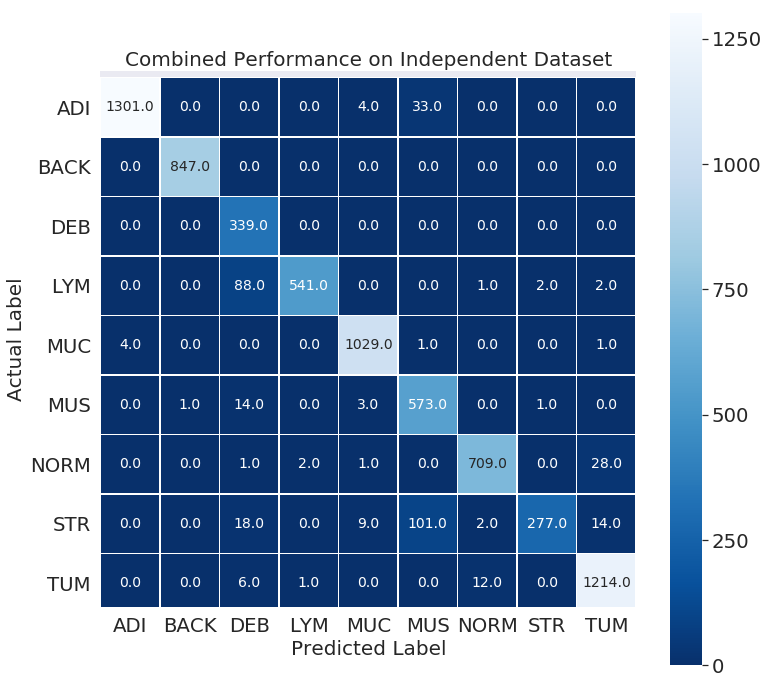

In [73]:
# Confusion Matrix
combined_conf_mat_7K = pd.DataFrame(confusion_matrix(ind_test_generator.classes, combined_prediction_labels), 
                        index=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'], 
                        columns=['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'])

# Plot confusion matrices
sns.set(font_scale=1.8)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

#ax1
sns.heatmap(combined_conf_mat_7K, ax=ax, annot=True, fmt=".1f", linewidths=0.5, square=True, cmap='Blues_r', annot_kws={"size": 14})
ax.set_ylabel("Actual Label", fontsize=20)
ax.set_xlabel("Predicted Label", fontsize=20)
all_sample_title="Combined Performance on Independent Dataset"
ax.set_title(all_sample_title, size=20)
ax.set_ylim(len(vgg_conf_mat_7K)-0.1, -0.1)